In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate,special
from scipy.linalg import eig,eigh,eigvals,eigvalsh
from scipy.sparse.linalg import eigs
import itertools as it
from functions import isingmodel_rev,isingmodel_rev_frac2,construct_ham,construct_distant_ham_2sites
import itertools as it
import qutip as q

In [3]:
def func1(phi,l,lamb,gamma):
    
    part1=(lamb-np.cos(phi))/np.sqrt((lamb-np.cos(phi))**2+(gamma*np.sin(phi))**2)
    
    return part1*np.cos(l*phi)/np.pi

def func2(phi,l,lamb,gamma):
    
    part2=(gamma*(np.sin(phi)))/np.sqrt((lamb-np.cos(phi))**2+(gamma*np.sin(phi))**2)
    
    return -part2*np.sin(l*phi)/np.pi

def gfunc(l,lamb,gamma=1):
    
    integ1=integrate.quad(func1,0,np.pi,args=(l,lamb,gamma))
    integ2=integrate.quad(func2,0,np.pi,args=(l,lamb,gamma))
    
    return integ1[0]-integ2[0]


def assign_g(a,b,lamb,gamma=1):
    if a==b:
        return 0
    d=b-a 
    if d%2==1:
        if a%2==1:
            return 1j*gfunc((d-1)//2,lamb,gamma)
        elif a%2==0:
            
            return -1j*gfunc(-((d+1)//2),lamb,gamma)
    else:
        return 0
    
def assign_g_debug(a,b):
    if a==b:
        return 0
    d=b-a 
    if d%2==1:
        if a%2==1:
            return "ig[{}]".format((d-1)//2)
        elif a%2==0:
            
            return "-ig[{}]".format(-(d+1)//2)
    else:
        return 0

def get_mat(lam,gamma=1):
    mat = [[None for c in range(1,2*L+1)] for r in range(1,2*L+1)]
    for x in range(1,2*L+1):
        for y in range(1,2*L+1):
            mat[x-1][y-1]=assign_g(x,y,lam,gamma)  
    return np.array(mat)

In [17]:
L=3
lambdarange=np.linspace(0.1,2,500)

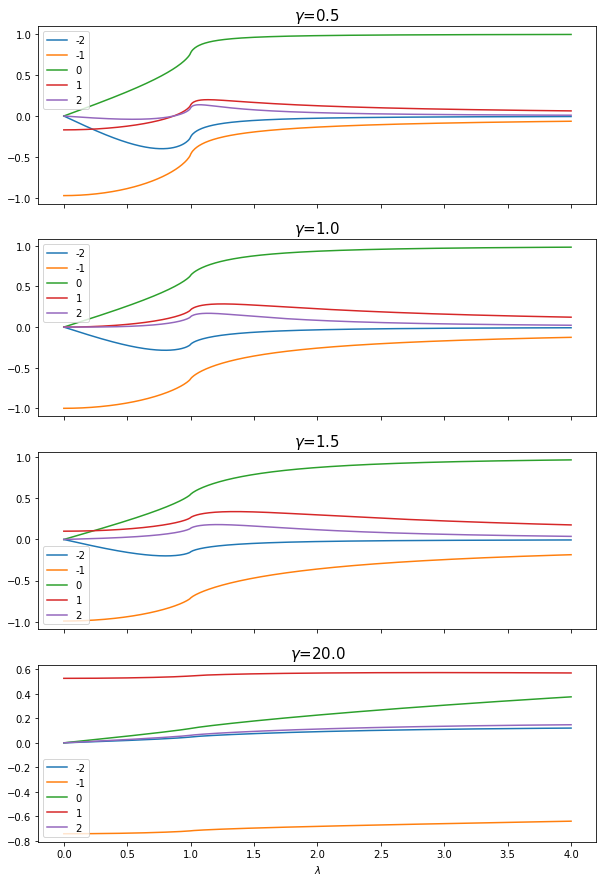

In [22]:
lambdarange=np.linspace(0,4,500)
figs,axs=plt.subplots(4,sharex=True,figsize=[10,15])
for n,gs in enumerate((0.5,1,1.5,20)):

    for size in range(-L+1,L):
        temp_vec=np.zeros_like(lambdarange)
        for i,lam in enumerate(lambdarange):
            temp_vec[i]=gfunc(size,lam,gs)
        axs[n].plot(lambdarange,temp_vec,label=size)
    axs[n].set_title(r"$\gamma$={:.1f}".format(gs),fontsize=15)
    plt.xlabel(r"$\lambda$")
    axs[n].legend()
plt.savefig("somegs")

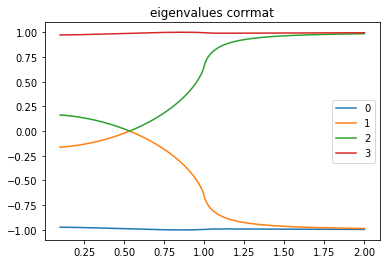

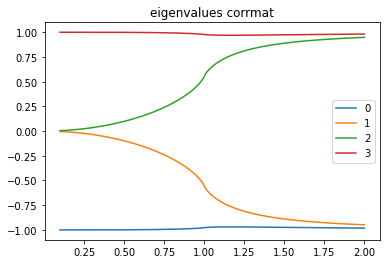

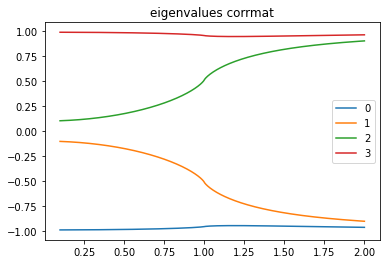

In [5]:
for gs in (0.5,1,1.5):
    autov={}
    for i,x in enumerate(lambdarange):
        matr=get_mat(x,gs)
        autov[i]=eigvalsh(matr)

    autovals=np.array([autov[i] for i in autov])
    for k in range(0,2*L):
        plt.plot(lambdarange,autovals[:,k],label=k)
    plt.title("eigenvalues corrmat")
    plt.legend()
    plt.show()

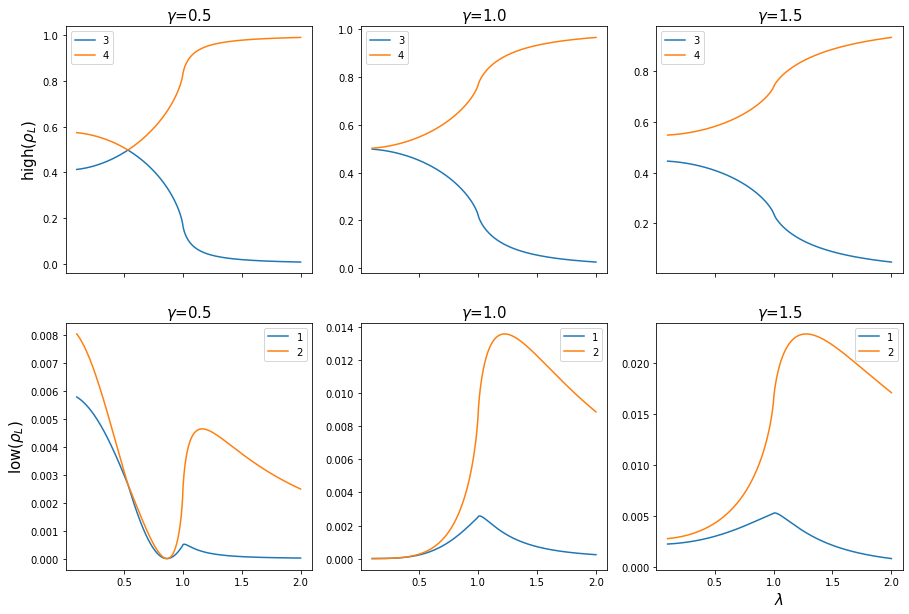

In [11]:
L=2
lambdarange=np.linspace(0.1,2,500)
colors=["blue","red","green"]
figs, axs = plt.subplots(2,3,sharex=True,figsize=[15,10])

for n,gs in enumerate([0.5,1,1.5]):
    
    autov={}
    for i,x in enumerate(lambdarange):
        matr=get_mat(x,gs)
        autov[i]=eigvalsh(matr)

    autovals=np.array([autov[i] for i in autov])
 
    nus=autovals[:,L:]


    eigrho=np.zeros((len(lambdarange),2**L))
    signs={}
    for j,sign in enumerate(it.product((range(-1,2,2)),repeat=L)):
        signarr=np.array(sign)
        signs[j]=signarr
        for i,row in enumerate(nus):
            rowsign=np.array([(1+signarr[n]*row[n])/2 for n in range(L)])
            eigrho[i,j]=np.prod(rowsign)
            
    eigrho=np.sort(eigrho)
    for k in range(2,4):
        axs[0,n].plot(lambdarange,eigrho[:,k],label=k+1)
        
    axs[0,n].legend()
    axs[0,0].set_ylabel(r"high($\rho_L$)",fontsize=15)
    
    axs[0,n].set_title(r"$\gamma$={:.1f}".format(gs),fontsize=15)
    
    for k in range(2):
        axs[1,n].plot(lambdarange,eigrho[:,k],label=k+1)
    
    axs[1,0].set_ylabel(r"low($\rho_L$)",fontsize=15)
    axs[1,n].legend()

    axs[1,n].set_title(r"$\gamma$={:.1f}".format(gs),fontsize=15)
plt.xlabel(r"$\lambda$",fontsize=15)

plt.savefig("2sites_3gammas")

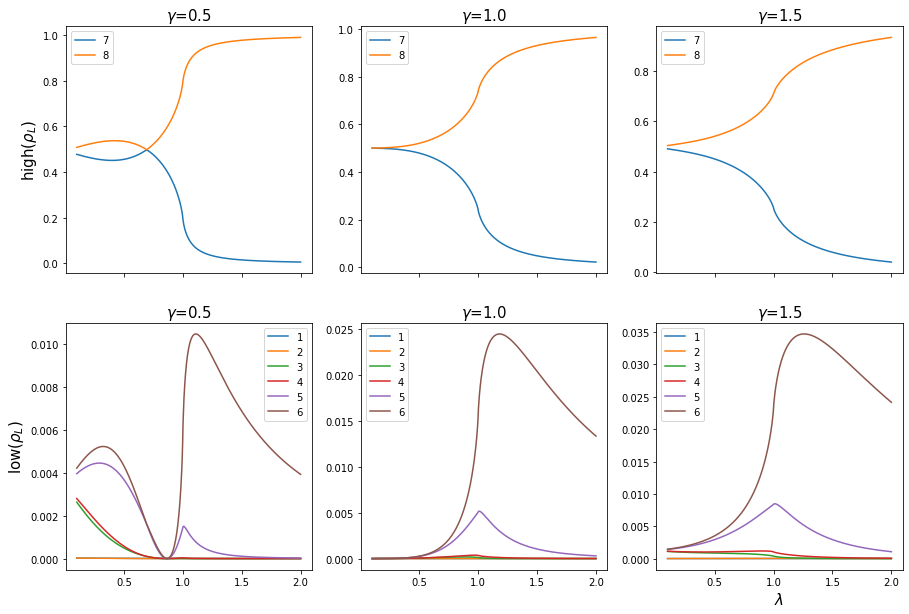

In [15]:
L=3
lambdarange=np.linspace(0.1,2,500)
colors=["blue","red","green"]
figs, axs = plt.subplots(2,3,sharex=True,figsize=[15,10])

for n,gs in enumerate([0.5,1,1.5]):
    
    autov={}
    for i,x in enumerate(lambdarange):
        matr=get_mat(x,gs)
        autov[i]=eigvalsh(matr)

    autovals=np.array([autov[i] for i in autov])
 
    nus=autovals[:,L:]


    eigrho=np.zeros((len(lambdarange),2**L))
    signs={}
    for j,sign in enumerate(it.product((range(-1,2,2)),repeat=L)):
        signarr=np.array(sign)
        signs[j]=signarr
        for i,row in enumerate(nus):
            rowsign=np.array([(1+signarr[n]*row[n])/2 for n in range(L)])
            eigrho[i,j]=np.prod(rowsign)
            
    eigrho=np.sort(eigrho)
    for k in range(2**L-2,2**L):
        axs[0,n].plot(lambdarange,eigrho[:,k],label=k+1)
        
    axs[0,n].legend()
    axs[0,0].set_ylabel(r"high($\rho_L$)",fontsize=15)
    
    axs[0,n].set_title(r"$\gamma$={:.1f}".format(gs),fontsize=15)
    
    for k in range(2**L-2):
        axs[1,n].plot(lambdarange,eigrho[:,k],label=k+1)
    
    axs[1,0].set_ylabel(r"low($\rho_L$)",fontsize=15)
    axs[1,n].legend()

    axs[1,n].set_title(r"$\gamma$={:.1f}".format(gs),fontsize=15)
plt.xlabel(r"$\lambda$",fontsize=15)

plt.savefig("3sites_3gammas")

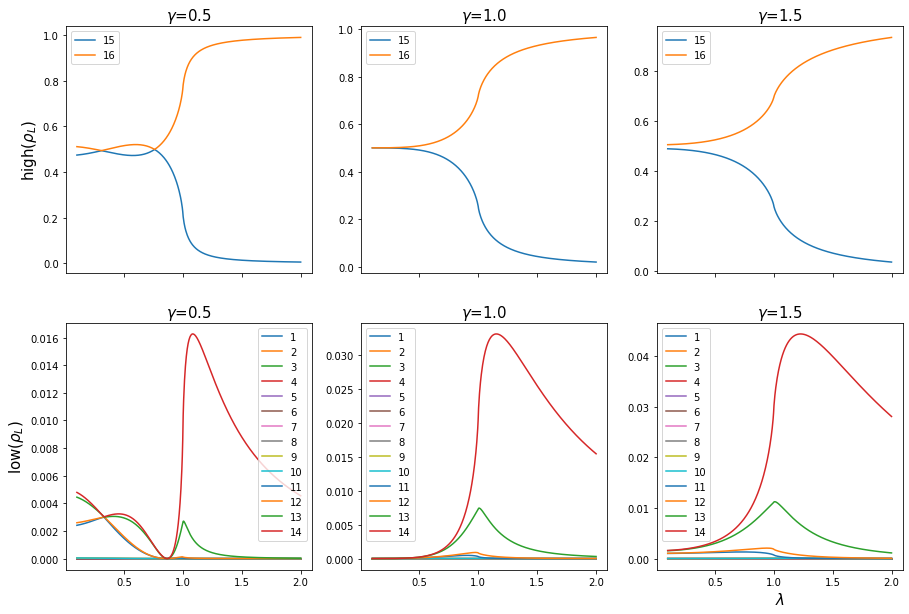

In [16]:
L=4
lambdarange=np.linspace(0.1,2,500)
colors=["blue","red","green"]
figs, axs = plt.subplots(2,3,sharex=True,figsize=[15,10])

for n,gs in enumerate([0.5,1,1.5]):
    
    autov={}
    for i,x in enumerate(lambdarange):
        matr=get_mat(x,gs)
        autov[i]=eigvalsh(matr)

    autovals=np.array([autov[i] for i in autov])
 
    nus=autovals[:,L:]


    eigrho=np.zeros((len(lambdarange),2**L))
    signs={}
    for j,sign in enumerate(it.product((range(-1,2,2)),repeat=L)):
        signarr=np.array(sign)
        signs[j]=signarr
        for i,row in enumerate(nus):
            rowsign=np.array([(1+signarr[n]*row[n])/2 for n in range(L)])
            eigrho[i,j]=np.prod(rowsign)
            
    eigrho=np.sort(eigrho)
    for k in range(2**L-2,2**L):
        axs[0,n].plot(lambdarange,eigrho[:,k],label=k+1)
        
    axs[0,n].legend()
    axs[0,0].set_ylabel(r"high($\rho_L$)",fontsize=15)
    
    axs[0,n].set_title(r"$\gamma$={:.1f}".format(gs),fontsize=15)
    
    for k in range(2**L-2):
        axs[1,n].plot(lambdarange,eigrho[:,k],label=k+1)
    
    axs[1,0].set_ylabel(r"low($\rho_L$)",fontsize=15)
    axs[1,n].legend()

    axs[1,n].set_title(r"$\gamma$={:.1f}".format(gs),fontsize=15)
plt.xlabel(r"$\lambda$",fontsize=15)

plt.savefig("4sites_3gammas")

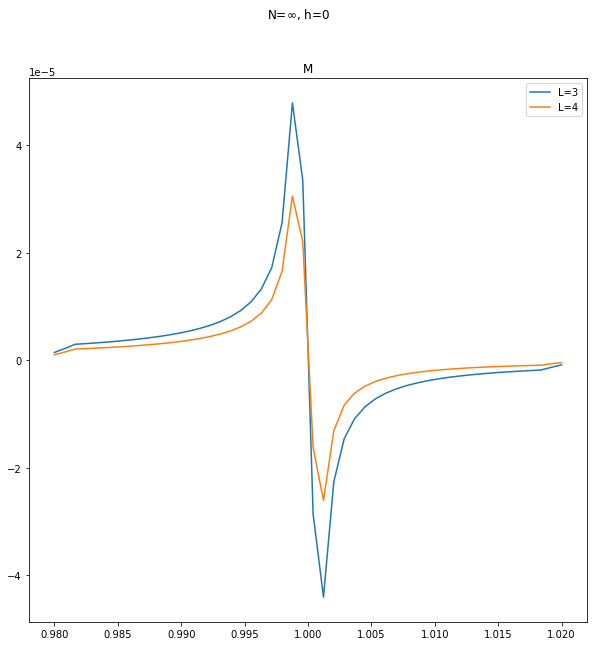

In [7]:
fig2, axs2 = plt.subplots(1,sharex=True,figsize=[10,10])

lambdarange=np.linspace(0.98,1.02)
for L in range(3,5):
    
    autov={}
    for i,x in enumerate(lambdarange):
        matr=get_mat(x)
        autov[i]=eigvalsh(matr)
    
    autovals=np.array([autov[i] for i in autov])
    nus=autovals[:,L:]

    eigrho={}
    for j,sign in enumerate(it.product((range(-1,2,2)),repeat=L)):
        signarr=np.array(sign)
        for i,row in enumerate(nus):
            rowsign=np.array([(1+signarr[n]*row[n])/2 for n in range(L)])
            eigrho[i,j]=np.prod(rowsign)
            
            
    max_ergos=np.zeros_like(lambdarange)

    for j,l in enumerate(lambdarange):    

        eigval=[eigrho[j,x] for x in range(2**L)]
        
        eigval=np.sort(eigval)
        
        reduced_H_matr=construct_ham(L,l)

        h_eigval = reduced_H_matr.eigenenergies()

        sortdesc=np.sort(eigval)[::-1]
        
        max_ergo=0
        for n in range(2**L):
            max_ergo+=(eigval[n]-sortdesc[n])*h_eigval[n]

        max_ergos[j]=(max_ergo)/(2*abs(h_eigval[0]))

    axs2.plot(lambdarange,np.gradient(np.gradient(max_ergos)),label="L={}".format(L))
    axs2.set_title("M")
    fig2.suptitle(r"N=$\infty$, h=0")
    axs2.legend()
plt.show()   